# Data Wrangling: Used Cars Pricing Analysis
## Objective

The objective of this project is to perform data wrangling on a dataset of used car prices to clean, transform, and prepare the data for further analysis. The goal is to ensure the dataset is free of inconsistencies, missing values, and errors, making it suitable for predictive modeling or exploratory analysis.

## Skills Demonstrated
- **Data Cleaning** : Handling missing values, replacing placeholders, and correcting data types.

- **Data Transformation** : Converting units (e.g., MPG to L/100km), normalizing numerical features, and standardizing formats.

- **Data Exploration** : Identifying patterns, outliers, and inconsistencies in the dataset.

- **Python Libraries** : Proficiency in Pandas, NumPy, and Matplotlib for data manipulation and visualization.
- **Problem-Solving** : Addressing challenges such as missing data and incorrect entries.

## Technologies Used
- **Python**: Primary programming language for data wrangling.
- **Pandas**: For data manipulation and cleaning.
- **NumPy**: For numerical operations and handling missing values.
- **Matplotlib/Seaborn**: For data visualization (though not extensively used in the provided notebook).
- **Requests**: For downloading the dataset from the web.

In [1]:
#install specific version of libraries used in lab
! mamba install pandas==1.3.3
! mamba install numpy=1.21.2
! pip install matplotlib



'mamba' is not recognized as an internal or external command,
operable program or batch file.
'mamba' is not recognized as an internal or external command,
operable program or batch file.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns


In [3]:
def download_streaming(url, filename):
    with requests.get(url, stream=True) as r:
        r.raise_for_status()
        with open(filename, "wb") as f:
            for chunk in r.iter_content(chunk_size=8192):
                f.write(chunk)


In [4]:
%pip install requests
file_path="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv" 
import requests

download_streaming(file_path, "usedcars.csv")
file_name = "usedcars.csv"

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

df = pd.read_csv(file_name, names = headers)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [6]:
import numpy as np

# replace "?" to NaN
df.replace("?", np.nan, inplace = True)

In [7]:
df["normalized-losses"].replace('?', np.nan, inplace=True)
df["bore"].replace('?', np.nan, inplace=True)
df["stroke"].replace('?', np.nan, inplace=True)
df["normalized-losses"] = df["normalized-losses"].astype("float")
df["bore"] = df["bore"].astype("float")
df["stroke"] = df["stroke"].astype("float")
df["normalized-losses"].fillna(df["normalized-losses"].mean(), inplace=True)
df["bore"].fillna(df["bore"].mean(), inplace=True)
df["stroke"].fillna(df["stroke"].mean(), inplace=True)

C:\Users\abiye\AppData\Local\Temp\ipykernel_3844\3796603652.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["normalized-losses"].replace('?', np.nan, inplace=True)
C:\Users\abiye\AppData\Local\Temp\ipykernel_3844\3796603652.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


In [8]:
df.dropna(subset=["price"], axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price", "peak-rpm", "horsepower"]] = df[["price", "peak-rpm", "horsepower"]].astype("float")
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [9]:
df['city-L/100km'] = 235/df["city-mpg"]
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556


In [10]:
missing_data = df.isnull()
missing_data.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

symboling
symboling
False    201
Name: count, dtype: int64

normalized-losses
normalized-losses
False    201
Name: count, dtype: int64

make
make
False    201
Name: count, dtype: int64

fuel-type
fuel-type
False    201
Name: count, dtype: int64

aspiration
aspiration
False    201
Name: count, dtype: int64

num-of-doors
num-of-doors
False    199
True       2
Name: count, dtype: int64

body-style
body-style
False    201
Name: count, dtype: int64

drive-wheels
drive-wheels
False    201
Name: count, dtype: int64

engine-location
engine-location
False    201
Name: count, dtype: int64

wheel-base
wheel-base
False    201
Name: count, dtype: int64

length
length
False    201
Name: count, dtype: int64

width
width
False    201
Name: count, dtype: int64

height
height
False    201
Name: count, dtype: int64

curb-weight
curb-weight
False    201
Name: count, dtype: int64

engine-type
engine-type
False    201
Name: count, dtype: int64

num-of-cylinders
num-of-cylinders
False    201
Name: count, dty

In [12]:
# Skip the first row if it contains headers or invalid data
avg_norm_loss = df["normalized-losses"].iloc[1:].astype("float").mean(axis=0)
print("Average of normalized-losses:", avg_norm_loss)

Average of normalized-losses: 122.0


In [13]:
avg_bore=df['bore'].astype('float').mean(axis=0)
print("Average of bore:", round( avg_bore, 2))

Average of bore: 3.33


In [14]:
avg_stroke = df['stroke'].astype('float').mean(axis=0)
print("Average of stroke:", round(avg_stroke, 2))

Average of stroke: 3.26


In [15]:
avg_horsepower = df['horsepower'].astype('float').mean(axis=0)
print("Average horsepower:", round(avg_horsepower, 2))

Average horsepower: 103.4


In [16]:
df['horsepower'] = df['horsepower'].replace(np.nan, avg_horsepower)

In [17]:
avg_peakrpm=df['peak-rpm'].astype('float').mean(axis=0)
print("Average peak rpm:", avg_peakrpm)

Average peak rpm: 5117.587939698493


In [18]:
avg_peakrpm = df['peak-rpm'].astype('float').mean(axis=0)
df['peak-rpm'] = df['peak-rpm'].replace(np.nan, avg_peakrpm)

In [19]:
df['num-of-doors'].value_counts()

num-of-doors
four    113
two      86
Name: count, dtype: int64

In [20]:
vc = df['num-of-doors'].value_counts()
if not vc.empty:
	most_frequent = vc.idxmax()
else:
	most_frequent = None
most_frequent

'four'

In [21]:
#replace the missing 'num-of-doors' values by the most frequent 
df["num-of-doors"].replace(np.nan, "four", inplace=True)

C:\Users\abiye\AppData\Local\Temp\ipykernel_3844\2406474689.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["num-of-doors"].replace(np.nan, "four", inplace=True)


In [22]:
# simply drop whole row with NaN in "price" column
df.dropna(subset=["price"], axis=0, inplace=True)

# reset index, because we droped two rows
df.reset_index(drop=True, inplace=True)

In [23]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556


In [24]:
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
dtype: object

In [25]:
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

In [26]:
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
dtype: object

In [27]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556


In [28]:
# Convert mpg to L/100km by mathematical operation (235 divided by mpg)
df['city-L/100km'] = 235/df["city-mpg"]

# check your transformed data 
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556


In [29]:
df["highway-mpg"] = 235/df["highway-mpg"]
df.rename(columns={"highway-mpg": "highway-L/100km"}, inplace=True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,8.703704,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,8.703704,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154.0,5000.0,19,9.038462,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102.0,5500.0,24,7.833333,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115.0,5500.0,18,10.681818,17450.0,13.055556


In [30]:
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,8.703704,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,8.703704,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154.0,5000.0,19,9.038462,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102.0,5500.0,24,7.833333,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115.0,5500.0,18,10.681818,17450.0,13.055556


In [31]:
df['height'] = df['height']/df['height'].max()
df[['length', 'width', 'height']] = df[['length', 'width', 'height']].round(2)
df[['length', 'width', 'height']].head()

,length,width,height
0,0.81,0.89,0.82
1,0.81,0.89,0.82
2,0.82,0.91,0.88
3,0.85,0.92,0.91
4,0.85,0.92,0.91


In [32]:
df["horsepower"]=df["horsepower"].astype(int, copy=True)

Text(0.5, 1.0, 'horsepower bins')

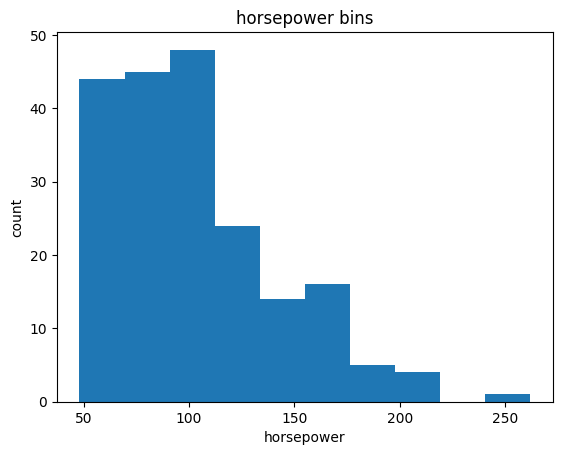

In [33]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["horsepower"])

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

array([ 48.  , 119.33, 190.67, 262.  ])

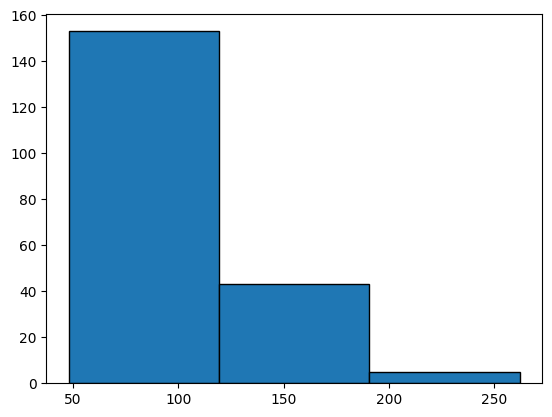

In [34]:
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4).round(2)
plt.pyplot.hist(df["horsepower"], bins=bins, edgecolor='black')
bins

In [35]:
group_names = ['Low', 'Medium', 'High']

In [36]:
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True )
df[['horsepower','horsepower-binned']].head(20)

,horsepower,horsepower-binned
0,111,Low
1,111,Low
2,154,Medium
3,102,Low
4,115,Low
5,110,Low
6,110,Low
7,110,Low
8,140,Medium
9,101,Low


In [37]:
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True )
df[['horsepower','horsepower-binned']].head(20)

,horsepower,horsepower-binned
0,111,Low
1,111,Low
2,154,Medium
3,102,Low
4,115,Low
5,110,Low
6,110,Low
7,110,Low
8,140,Medium
9,101,Low


In [38]:
df["horsepower-binned"].value_counts()

horsepower-binned
Low       153
Medium     43
High        5
Name: count, dtype: int64

Text(0.5, 1.0, 'horsepower bins')

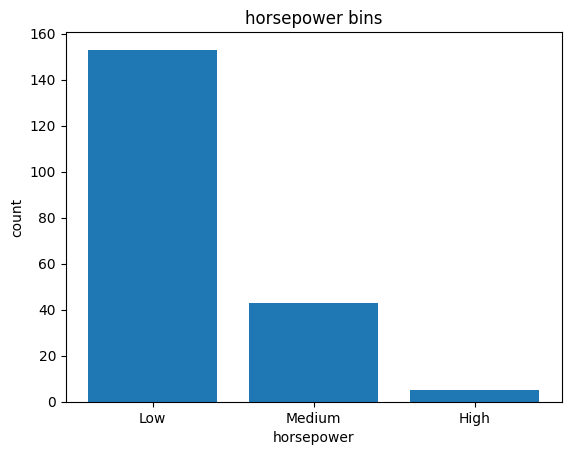

In [39]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, df["horsepower-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

Text(0.5, 1.0, 'horsepower bins')

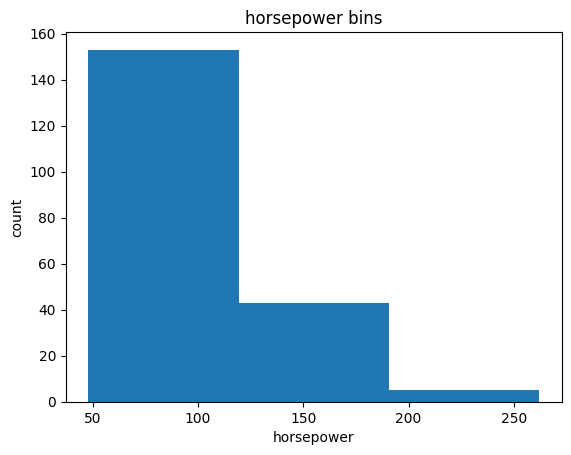

In [40]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot


# draw historgram of attribute "horsepower" with bins = 3
plt.pyplot.hist(df["horsepower"], bins = 3)

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

In [41]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-L/100km', 'price', 'city-L/100km', 'horsepower-binned'],
      dtype='object')

In [42]:
dummy_variable_1 = pd.get_dummies(df["fuel-type"])
dummy_variable_1.head()

,diesel,gas
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True


In [43]:
dummy_variable_1.rename(columns={'gas':'fuel-type-gas', 'diesel':'fuel-type-diesel'}, inplace=True)
dummy_variable_1.head()

,fuel-type-diesel,fuel-type-gas
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True


In [44]:
# merge data frame "df" and "dummy_variable_1" 
df = pd.concat([df, dummy_variable_1], axis=1)

# drop original column "fuel-type" from "df"
df.drop("fuel-type", axis = 1, inplace=True)

In [45]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.81,...,9.0,111,5000.0,21,8.703704,13495.0,11.190476,Low,False,True
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.81,...,9.0,111,5000.0,21,8.703704,16500.0,11.190476,Low,False,True
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.82,...,9.0,154,5000.0,19,9.038462,16500.0,12.368421,Medium,False,True
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.85,...,10.0,102,5500.0,24,7.833333,13950.0,9.791667,Low,False,True
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.85,...,8.0,115,5500.0,18,10.681818,17450.0,13.055556,Low,False,True


In [46]:
# Write your code below and press Shift+Enter to execute 
df['aspiration_turbo'] = (df['aspiration'] == 'turbo').astype(int)
df[['aspiration', 'aspiration_turbo']].head()

,aspiration,aspiration_turbo
0,std,0
1,std,0
2,std,0
3,std,0
4,std,0


C:\Users\abiye\AppData\Local\Temp\ipykernel_3844\2206450327.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="price", y="make", data=df[df["make"].isin(top_makes)], estimator='mean', ci=None)


AttributeError: module 'matplotlib' has no attribute 'title'

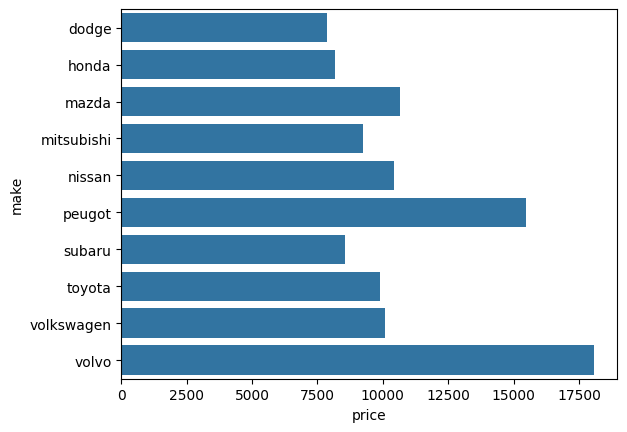

In [47]:
top_makes = df['make'].value_counts().nlargest(10).index
sns.barplot(x="price", y="make", data=df[df["make"].isin(top_makes)], estimator='mean', ci=None)
plt.title("Average Price by Car Make (Top 10)")
plt.xlabel("Average Price")
plt.ylabel("Car Make")
plt.tight_layout()
plt.show()

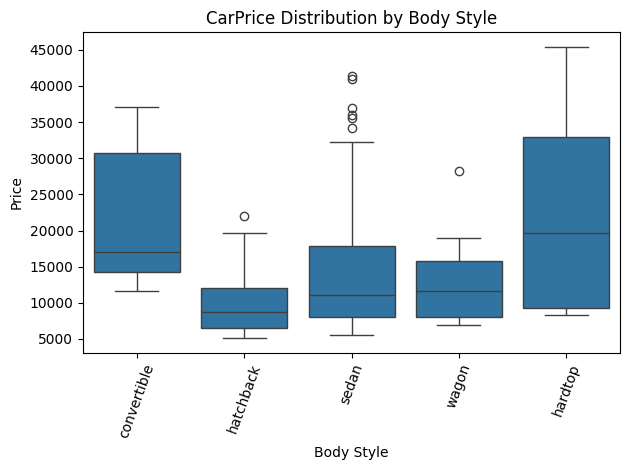

In [ ]:
sns.boxplot(x = "body-style", y= "price", data = df)
plt.title("CarPrice Distribution by Body Style")
plt.xlabel("Body Style")
plt.ylabel("Price")
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()

<Axes: xlabel='engine-size-binned', ylabel='price'>

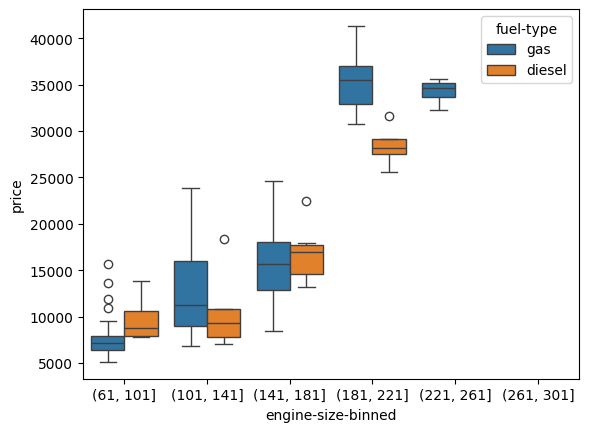

In [ ]:

df['fuel-type'] = df['fuel-type-gas'].map({True: 'gas', False: 'diesel'})
df['engine-size-binned'] = pd.cut(df['engine-size'], 
                                  bins=range(int(df['engine-size'].min()), int(df['engine-size'].max()) + 15, 40))
sns.boxplot(x="engine-size-binned", y="price", hue="fuel-type", data=df)

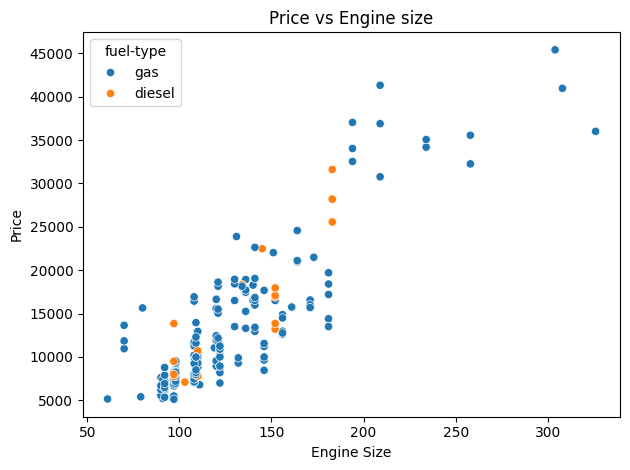

In [ ]:
sns.scatterplot(x="engine-size", y="price", hue="fuel-type", data=df)
plt.title("Price vs Engine size")
plt.xlabel("Engine Size")
plt.ylabel("Price")
plt.tight_layout()
plt.show()

C:\Users\abiye\AppData\Local\Temp\ipykernel_13396\55294593.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="drive-wheels", y="price", data=df, estimator='mean', ci=None)


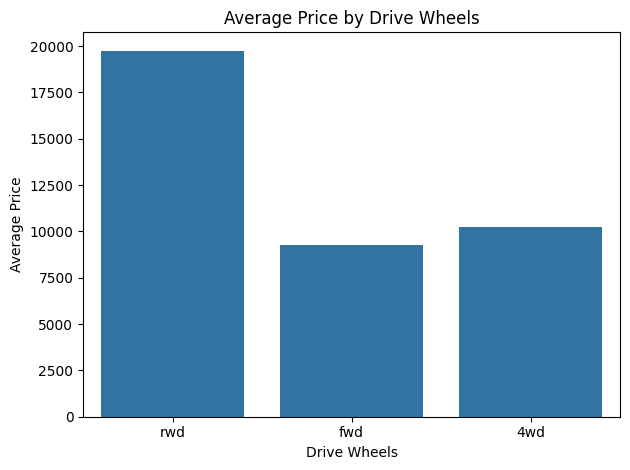

In [ ]:
sns.barplot(x="drive-wheels", y="price", data=df, estimator='mean', ci=None)
plt.title("Average Price by Drive Wheels")
plt.xlabel("Drive Wheels")
plt.ylabel("Average Price")
plt.tight_layout()
plt.show()

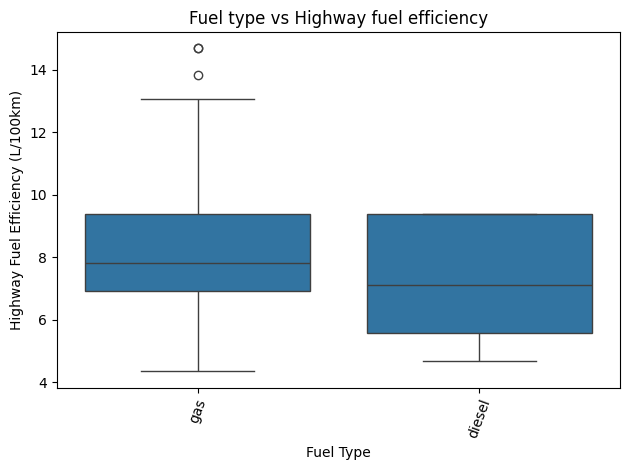

In [ ]:

if "highway-L/100km" not in df.columns:
	df["highway-L/100km"] = 235 / df["highway-mpg"]

sns.boxplot(x="fuel-type", y="highway-L/100km", data=df)
plt.title("Fuel type vs Highway fuel efficiency")
plt.xlabel("Fuel Type")
plt.ylabel("Highway Fuel Efficiency")
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()

C:\Users\abiye\AppData\Local\Temp\ipykernel_13396\2372891537.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="fuel-type", y="highway-L/100km", data=df, estimator='mean', ci=None)


Text(0, 0.5, 'Highway Fuel Efficiency')

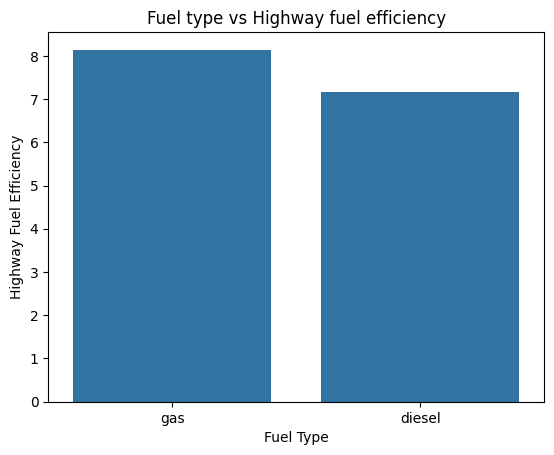

In [ ]:
sns.barplot(x="fuel-type", y="highway-L/100km", data=df, estimator='mean', ci=None)
plt.title("Fuel type vs Highway fuel efficiency")
plt.xlabel("Fuel Type")
plt.ylabel("Highway Fuel Efficiency")

In [ ]:
df.to_csv('clean_df.csv')

## Key Insights:
* Handling Missing Data:
    -   Replaced placeholder "?" with NaN for missing values.

    -   Filled missing values in columns like normalized-losses, bore, and stroke with their respective means.

    -   Dropped rows with missing price values, as they are critical for analysis.

* Data Type Correction:

    -   Converted columns like normalized-losses, bore, stroke, horsepower, peak-rpm, and price to appropriate data types (e.g., float or int).
* Feature Engineering:

    -   Created a new column city-L/100km by converting city-mpg to liters per 100 kilometers for better interpretability.

    -   Normalized numerical features like length and width to a [0, 1] scale for consistency.

* Categorical Data:

    -   Addressed missing values in num-of-doors by replacing them with the most frequent value ("four").

* Data Integrity:

    -   Ensured no missing values remain in critical columns after cleaning.

-   Verified data types and consistency across the dataset.

### Conclusion and Key Findings

**Data Quality:** The dataset had several missing values and inconsistent entries, which were systematically addressed to improve reliability.

**ransformations:** Unit conversions and normalization were applied to make the data more interpretable and suitable for analysis.

**Rteadiness for Analysis:** After wrangling, the dataset is now clean, consistent, and ready for exploratory data analysis or machine learning modeling.

**Future Steps:** Further analysis could include visualizing relationships between features (e.g., horsepower vs. price) or building predictive models to estimate car prices based on other attributes.
